## Basic KNN algorithm on Diabetes data


## Sagan osuus alkaa

### Preparing the environment for data visualization and machine learning tasks

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


### Loding the data into a dataframe, and showing the first 5 rows of the dataframe. The full data can be seen in Ilaris' dataframe in Github:

In [136]:
#importing dataset
df=pd.read_csv("C:/Users/sagan/Desktop/Machine_Learning/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Tässä Diabetes datasetissä listataan muuttujia 9:ssä sarakkeessa, joista 8:ssa sarakkeessa on mittaustuloksista ja niistä johdetuista laskennoissa saatua numeerista dataa. Outcome sarakkeessa listataan nollia ja ykkösiä, joiden merkitys on seuraava: 0 = Henkilöllä ei ole diabetesta mittausten perusteella, 1 = Henkilöllö on diabetes mittausten perusteella. Tässä Outcome muuttujassa on siten kaksi luokkaa, ja mittaustulosten data on luokiteltava jompaan kumpaan luokkaan. 
   
Seuraavaksi haluamme ymmärtää datan koon, ja voimme käyttää seuraavaa tapaa saadaksemme tietää rivien ja sarakkeiden määrän diabetes dataframessa.    

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [138]:
print("The number of rows and columns: ")
df.shape


The number of rows and columns: 


(768, 9)

Datassa on yhteensä 768 mittausta, ja kahdeksan muuttujaa mittaustuloksille, independent variables/riippumaton muuttuja/piirremuuttuja/feature variable. 

Datassa on yksi dependent variable/riippuva muuttuja/kohdemuuttuja/target variable Outcome. 



###### (Tilastollisessa ja koneoppimisen terminologiassa:

###### Piirremuuttuja (Riippumaton muuttuja): Nämä ovat muuttujia, joita manipuloit tai käytät ennusteiden tekemiseen tai vaihtelun selittämiseen riippuvassa muuttujassa. Piirremuuttujat ovat malleihin syötettäviä tietoja ja ne sijoittuvat tyypillisesti graafin x-akselille.

###### Kohdemuuttuja (Riippuva muuttuja): Kohdemuuttuja on se, mitä yrität ennustaa tai selittää. Se riippuu piirremuuttujista. Kohdemuuttuja sijoittuu yleensä graafin y-akselille.

###### Esimerkiksi regressioanalyysissä voit käyttää yhtä tai useampaa piirremuuttujaa ennustamaan kohdemuuttujan arvoa. Piirremuuttujat ovat riippumattomia, koska ne eivät riipu kohdemuuttujasta; sen sijaan niitä käytetään ennustamaan tai selittämään muutoksia kohdemuuttujassa.)


Tässä käsiteltävät tiedot ovat suhteellisen pieniä = 768 näytettä.
Kuinka jakaa näytteet mallin koulutukseen ja testaukseen?

70 % koulutukseen, 30 % testaukseen:
Koulutusjoukko: 537 näytettä (noin 70 % 768:sta)
Testijoukko: 231 näytettä (noin 30 % 768:sta)

80 % koulutukseen, 20 % testaukseen:
Koulutusjoukko: 614 näytettä (noin 80 % 768:sta)
Testijoukko: 154 näytettä (noin 20 % 768:sta)

75 % koulutukseen, 25 % testaukseen:
Koulutusjoukko: 576 näytettä (noin 75 % 768:sta)
Testijoukko: 192 näytettä (noin 25 % 768:sta)

Suurempi koulutusjoukko voi olla hyödyllinen, kun on paljon dataa, koska se mahdollistaa mallin oppimisen enemmän datasta. Kuitenkin, jos datasettisi on pieni tai tarvitaan  "robust evaluation of the model's generalization", voi suurempi testijoukko olla tarpeen.

Seuraavaksi haluamme nopean yleiskatsauksen datan jakautumisesta kussakin sarakkeessa.

In [139]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Tutkittuamme Diabetes datasettiä, huomasimme joissakin sarakkeissa 0 arvoja (alla kyseiset sarakkeet), jotka edustavat mitä luultavimmin puuttuvia arvoja, sillä näistä kyseisistä mittauksista ihmisillä ei voi olla 0 arvona:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

Siten, voi kokeilla korvata 0 arvot nan-arvolla, jotta 0 arvot eivät vaikuta negatiivisesti datankäsittelyyn eri kirjastoissa, ja numeerisen datan käsittelyssä. Käytin mallina seuraaviin toimenpiteisiin toisen Kagglesta löytämäni Notebookin toteutusta samasta datasetistä. Korvaan seuraavaksi 0 arvot nan arvoilla, ja tulostan sen jälkeen datasta yksikertaiset histogrammit, jotta voidaan vertailla, miten 0 arvojen poistaminen numeerisesta datasta vaikutti dataan. Sen jälkeen korvaan nan arvot mean, tai median- arvoilla datassa, jonka jälkeen tulostan kuvaajat uudelleen. Kuvaajioen tulkinta jää tämän kurssityön ulkopuolelle. 

In [140]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


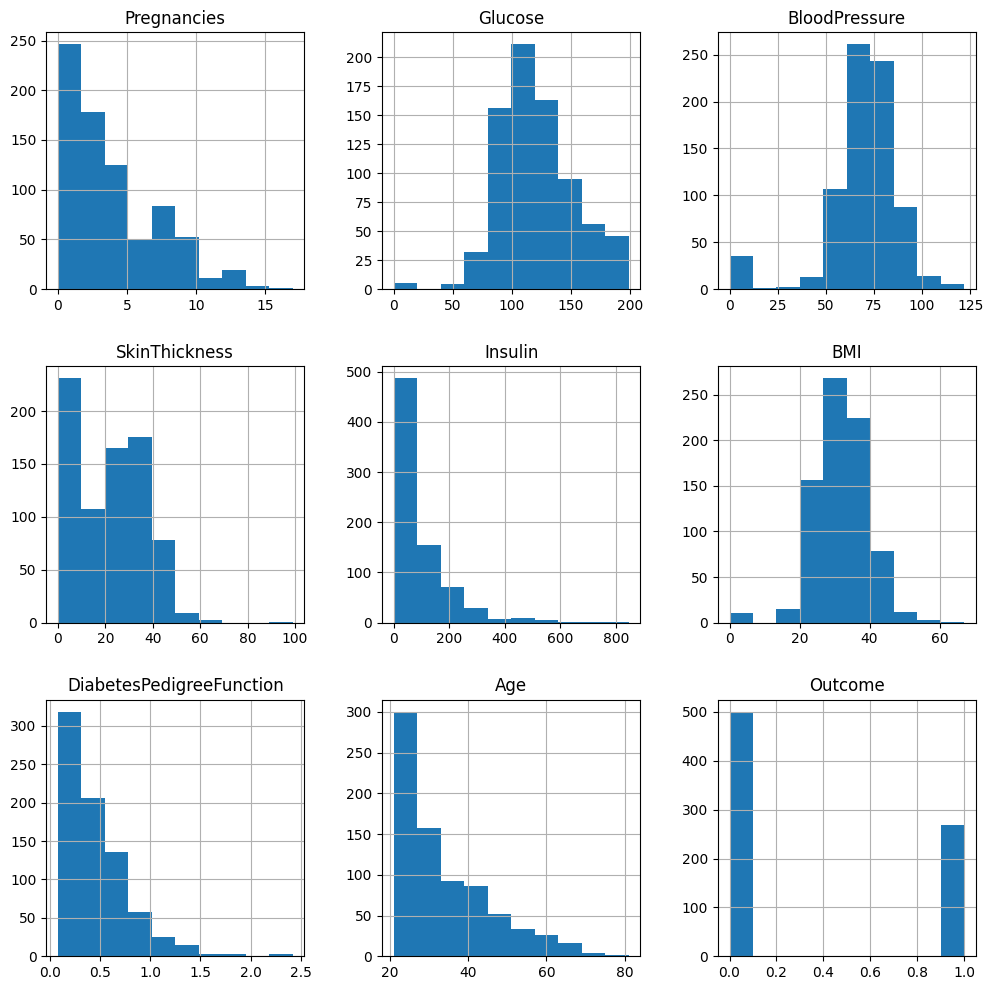

In [141]:
p = df.hist(figsize = (12,12))

nan arvojen syöttäminen, eli korvataan nan mean tai median arvolla, jotka saatiin df.describe taulun perusteella. 

In [142]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

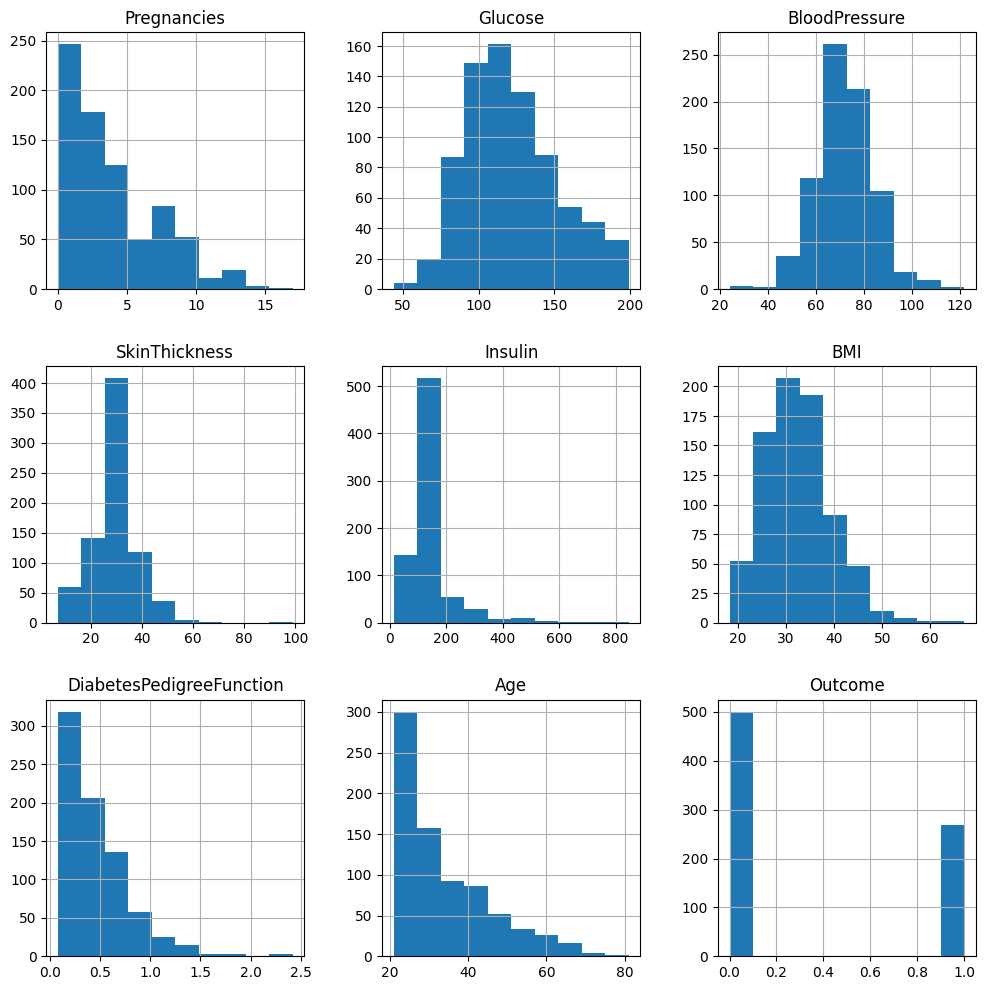

In [143]:
p = df_copy.hist(figsize = (12,12))

Seuraava koodi käyttää StandardScaler-työkalua scikit-learn-kirjastosta ominaisuuksien standardoimiseen DataFrame-objektissa ja tallentaa standardoidut tiedot uuteen DataFrame-objektiin siten, että "Outcome" saraketta ei oteta huomioon. Tämän koodin suorittamisen jälkeen X DataFrame sisältää standardoidut piirteet, joissa jokaisella piirteellä on keskiarvo 0 ja keskihajonta 1. Tämä standardointi on hyödyllistä algoritmeille, jotka ovat herkkiä syötteiden piirteiden mittakaavalle, koska se varmistaa, että kaikki piirteet ovat samankaltaisella mittakaavalla mallinnusta ja analyysiä varten.

In [144]:
import sklearn
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

Tulostetaan uusi taulukko, ja tallennetaan se y -muuttujaan. 

In [145]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


Määritetään "Outcome" sarake df_copy muuttujaan y. Tässä siis y edustaa y kohdemuuttujan arvoja, joita halutaan siis ennustaa käyttäen DataFrame X sisältämiä piirremuuttujien arvoja.X siis sisältää syötteiden piirteet, ja y sisältää niihin liittyvät luokittelutulokset. 

In [146]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = df_copy.Outcome

## Saga: Basic KNN Classification on the Diabetes Dataset

x ja y ovat piirremuuttuja (independent, riippumaton muuttuja) ja kohdemuuttuja(dependent, riippuva muuttuja)

train_test_split on funktio scikit-learnista (sklearn.model_selection), joka jakaa datasetin sattumanvaraisesti koulutus- ja testijoukkoihin.

test_size on asetettu ensiksi arvoon 0,2, mikä tarkoittaa, että 20 % datasta käytetään testaamiseen ja loput 80 % koulutetaan koneoppimismallin kehittämiseen.

shuffle on asetettu arvoon True, mikä tarkoittaa, että dataa sekoitetaan ennen jakamista. Tämä on tärkeää, jotta data jakautuu satunnaisesti koulutus- ja testijoukkoihin.

random_state on asetettu arvoon 42, mikä on satunnaislukugeneraattorin siemen, jota käytetään datan sekoittamiseen ja jakamiseen. Asettamalla satunnaisen siemenen varmistetaan, että jako on toistettavissa esimerkiksi ryhmätyömme aikana. 

In [147]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

Seuraavaksi käytetään scikit-learnin K-lähimmät naapurit (KNN) -luokittelijaa ennustamaan testidatalla.

Seuraava koodi käyttää scikit-learnin K-lähimmät naapurit (KNN) -luokittelijaa ennustamaan testidatasetilla. Tämä koodi asettaa K:n arvoksi 3, alustaa K-lähimmät naapurit -luokittelijan K:ksi naapurien määräksi, tekee ennustuksia testidatalla x_test käyttäen knn-luokittelijaa ja tulostaa ennustetut arvot konsoliin."

In [148]:
K=3  #  DIABETES DATASETISSA OLI KAKSI LUOKKAA NIIN K=2 EI OLE SITEN HYVA VALINTA YHDEKSI K ARVOKSI, VAAN ESIMERKIKSI TASSA TAPAUKSESSA VOIDAAN ALOITTAA K=3 ARVOLLA. 
knn=KNeighborsClassifier(K)
# Tassa on kyse valvotusta oppimisesta, joten tassa otetaan mukaan x-train piirremuuttujat, seka ne target arvot mukaan treenaamiseen. Fit metodilla tarkoitetaan treenausta. 
knn.fit(x_train, y_train)
# ennustus eli predict vaihe, missa lasketaan etaisyydet, ensin kaikkiin pisteisiin, sitten sort- jarjestellaan, sitten return-palautetaan ne ennustukset siitä, mihin luokkaan algoritmi olettaa diabetes-testattujen henkilöiden kuuluvan
y_pred_sklearn= knn.predict(x_test)
print(y_pred_sklearn)

[1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0
 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1]


Seuraava koodi laskee ja tulostaa tarkkuuspisteen koneoppimismallin ennusteille. Tämä koodi tuo ensin accuracy_score-funktion scikit-learnin metrics-moduulista. Sen jälkeen se laskee tarkkuuspisteen vertaamalla todellisia tietomerkintöjä y_test testidatasetista ennustettuihin tietomerkintöihin y_pred_sklearn ja tallentaa tuloksen muuttujaan tarkkuus. Viimeiseksi se tulostaa tarkkuuspisteen konsoliin.

In [149]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_sklearn)
accuracy_score(y_test, y_pred_sklearn)
print("Accuracy:", accuracy)

Accuracy: 0.6948051948051948


Seuraava koodi suorittaa silmukan, jossa sovitetaan K-lähimmät naapurit (KNN) -luokittelija eri arvoilla k (naapurien määrä) välillä 1 - 49 ja tulostetaan tarkkuuspisteet kullekin k:n arvolle. Tässä koodissa silmukka iteroi arvojen k läpi 1:stä 49:ään, ja jokaiselle k:n arvolle se luo KNN-luokittelijan, sovittaa sen koulutusdataan (x_train ja y_train), tekee ennusteita testidatasta (x_test), laskee tarkkuuspisteen ja tulostaa tarkkuuspisteen yhdessä vastaavan k:n arvon kanssa.

In [150]:

for k in range(1,50):
  knn=KNeighborsClassifier(k)
  knn.fit(x_train, y_train)
  y_pred_sklearn= knn.predict(x_test)
  print(accuracy_score(y_test, y_pred_sklearn))


0.6623376623376623
0.6558441558441559
0.6948051948051948
0.7207792207792207
0.7337662337662337
0.7142857142857143
0.7012987012987013
0.7337662337662337
0.7272727272727273
0.7597402597402597
0.7597402597402597
0.7727272727272727
0.7597402597402597
0.7727272727272727
0.7402597402597403
0.7532467532467533
0.7597402597402597
0.7597402597402597
0.7727272727272727
0.7727272727272727
0.7662337662337663
0.7662337662337663
0.7532467532467533
0.7792207792207793
0.7532467532467533
0.7727272727272727
0.7597402597402597
0.7467532467532467
0.7272727272727273
0.7337662337662337
0.7337662337662337
0.7532467532467533
0.7532467532467533
0.7597402597402597
0.7467532467532467
0.7402597402597403
0.7467532467532467
0.7597402597402597
0.7662337662337663
0.7467532467532467
0.7597402597402597
0.7597402597402597
0.7662337662337663
0.7662337662337663
0.7597402597402597
0.7597402597402597
0.7532467532467533
0.7597402597402597
0.7662337662337663


accuracy score- tarkkuuspiste näyttäisi olevan korkeimmillaan, kun k:n arvo on esimerkiksi välillä 12 - 16. Valitaan seuraavaksi pariton k:n arvo tuolta väliltä, sillä datassa kohdemuuttujan luokkia on kaksi, eli parillinen määrä. 

In [151]:
K=13
knn=KNeighborsClassifier(K)
knn.fit(x_train, y_train)
y_pred_sklearn= knn.predict(x_test)
print(y_pred_sklearn)

[1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [152]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_sklearn)
accuracy_score(y_test, y_pred_sklearn)
print("Accuracy:", accuracy)

Accuracy: 0.7597402597402597


Kokeillaan vielä K = 18, joka esimerkin notebookissa oli antanut korkeimman accuracy scoren. 

In [153]:
K=18
knn=KNeighborsClassifier(K)
knn.fit(x_train, y_train)
y_pred_sklearn= knn.predict(x_test)
print(y_pred_sklearn)

[1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [154]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_sklearn)
accuracy_score(y_test, y_pred_sklearn)
print("Accuracy:", accuracy)

Accuracy: 0.7597402597402597


In [155]:
K=16
knn=KNeighborsClassifier(K)
knn.fit(x_train, y_train)
y_pred_sklearn= knn.predict(x_test)
print(y_pred_sklearn)

[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0]


In [156]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_sklearn)
accuracy_score(y_test, y_pred_sklearn)
print("Accuracy:", accuracy)

Accuracy: 0.7532467532467533


Seuraavaksi kokeillaan vielä luokittelua, kun k=13 (kuten yllä), mutta data omn jaettu seuraavasti: 

70 % koulutukseen, 30 % testaukseen:
Koulutusjoukko: 537 näytettä (noin 70 % 768:sta)
Testijoukko: 231 näytettä (noin 30 % 768:sta)




In [157]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 42)

In [158]:
K=13  

knn=KNeighborsClassifier(K)
 
knn.fit(x_train, y_train)
 
y_pred_sklearn= knn.predict(x_test)
print(y_pred_sklearn)

[1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 1 0 0 0]


In [159]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_sklearn)
accuracy_score(y_test, y_pred_sklearn)
print("Accuracy:", accuracy)

Accuracy: 0.7489177489177489


Ja kokeillaan vielä luokittelua, kun k=13 (kuten yllä), mutta data omn jaettu seuraavasti: 
75 % koulutukseen, 25 % testaukseen:
Koulutusjoukko: 576 näytettä (noin 75 % 768:sta)
Testijoukko: 192 näytettä (noin 25 % 768:sta)

In [160]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 42)

In [161]:
K=13  

knn=KNeighborsClassifier(K)
 
knn.fit(x_train, y_train)
 
y_pred_sklearn= knn.predict(x_test)
print(y_pred_sklearn)

[1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0]


In [162]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_sklearn)
accuracy_score(y_test, y_pred_sklearn)
print("Accuracy:", accuracy)

Accuracy: 0.734375


### Accuracy score näyttäisi olevan korkeimmillaan, kun k=13 ja datan jako on 80 % koulutukseen, 20 % testaukseen:
Koulutusjoukko: 614 näytettä (noin 80 % 768:sta)
Testijoukko: 154 näytettä (noin 20 % 768:sta)


K-fold- ristivalidointi:

 Datasetti jaetaan K osaan tai fold. Kun on 768 datapistettä ja valitsen K:ksi 4, saan 4 osaa (fold), joista kussakin on 192 datapistettä.

Mallia koulutetaan ja arvioidaan K kertaa. Jokaisessa iteraatiossa yksi K fold käytetään testijoukkona ja muut K-1 osasta käytetään koulutusjoukkona.

Jokaisessa iteraatiossa suoritusmittari, kuten tarkkuus tai keskimääräinen neliövirhe, lasketaan testijoukossa.

K suoritusmittarit keskiarvoitetaan yhden suoritusmittarin saamiseksi mallille. (a single performance measure for the model)

K-sarjan ristivalidointia voidaan käyttää myös mallin valintaan ja hyperparametrien hienosäätöön. Esimerkiksi voidaan suorittaa K-sarjan ristivalidoinnin eri hyperparametreille ja valita hyperparametrit, jotka tuottavat parhaan keskimääräisen suorituksen.

In [163]:
from sklearn.model_selection import KFold


n_splits= 4 ## Choose the number of splits
k=13
kf= KFold(n_splits= n_splits, shuffle=True) ## Call the K Fold function. Note because of shuffle, the results may vary run by run
summa=0

for train_idx, test_idx in  kf.split(X): ## Loop over the splits
    x_train = X.iloc[train_idx, :] ## fetch the values
    x_test = X.iloc[test_idx, :]

    y_train = y.iloc[train_idx] ## fetch the values
    y_test = y.iloc[test_idx]

    knn=KNeighborsClassifier(k)
    knn.fit(x_train, y_train)

    y_pred_test = knn.predict(x_test)

    summa += accuracy_score(y_pred_test, y_test)

print(summa/n_splits)

0.7552083333333334


In [164]:
n_splits= 3 ## Choose the number of splits
k=13
kf= KFold(n_splits= n_splits, shuffle=True) ## Call the K Fold function. Note because of shuffle, the results may vary run by run
summa=0

for train_idx, test_idx in  kf.split(X): ## Loop over the splits
    x_train = X.iloc[train_idx, :] ## fetch the values
    x_test = X.iloc[test_idx, :]

    y_train = y.iloc[train_idx] ## fetch the values
    y_test = y.iloc[test_idx]

    knn=KNeighborsClassifier(k)
    knn.fit(x_train, y_train)

    y_pred_test = knn.predict(x_test)

    summa += accuracy_score(y_pred_test, y_test)

print(summa/n_splits)

0.7552083333333334


In [165]:
n_splits= 5 ## Choose the number of splits
k=13
kf= KFold(n_splits= n_splits, shuffle=True) ## Call the K Fold function. Note because of shuffle, the results may vary run by run
summa=0

for train_idx, test_idx in  kf.split(X): ## Loop over the splits
    x_train = X.iloc[train_idx, :] ## fetch the values
    x_test = X.iloc[test_idx, :]

    y_train = y.iloc[train_idx] ## fetch the values
    y_test = y.iloc[test_idx]

    knn=KNeighborsClassifier(k)
    knn.fit(x_train, y_train)

    y_pred_test = knn.predict(x_test)

    summa += accuracy_score(y_pred_test, y_test)

print(summa/n_splits)

0.7656226126814362


## Splittien määrä 6 ja K = 13 tuotti korkeimman accuracy_score'n

In [166]:
n_splits= 6 ## Choose the number of splits
k=13
kf= KFold(n_splits= n_splits, shuffle=True) ## Call the K Fold function. Note because of shuffle, the results may vary run by run
summa=0

for train_idx, test_idx in  kf.split(X): ## Loop over the splits
    x_train = X.iloc[train_idx, :] ## fetch the values
    x_test = X.iloc[test_idx, :]

    y_train = y.iloc[train_idx] ## fetch the values
    y_test = y.iloc[test_idx]

    knn=KNeighborsClassifier(k)
    knn.fit(x_train, y_train)

    y_pred_test = knn.predict(x_test)

    summa += accuracy_score(y_pred_test, y_test)

print(summa/n_splits)

0.7708333333333334


In [167]:
n_splits= 7 ## Choose the number of splits
k=13
kf= KFold(n_splits= n_splits, shuffle=True) ## Call the K Fold function. Note because of shuffle, the results may vary run by run
summa=0

for train_idx, test_idx in  kf.split(X): ## Loop over the splits
    x_train = X.iloc[train_idx, :] ## fetch the values
    x_test = X.iloc[test_idx, :]

    y_train = y.iloc[train_idx] ## fetch the values
    y_test = y.iloc[test_idx]

    knn=KNeighborsClassifier(k)
    knn.fit(x_train, y_train)

    y_pred_test = knn.predict(x_test)

    summa += accuracy_score(y_pred_test, y_test)

print(summa/n_splits)

0.7643631597760038


## Sagan osuus loppuu

## Plotting nan 


 Now we can plot the distribution of data wrt dependent variable i.e outcome

In [168]:
#sns.pairplot(df,hue='Outcome')


  5. Which are most useful variable in classification? Prove using correlation.

In [169]:
#corr = df.corr()
#corr.style.background_gradient(cmap='coolwarm')

Here, from correlation matrix we can see that age is highly correlated with outcome.

Text(0.5, 1.0, 'Age Distribution')

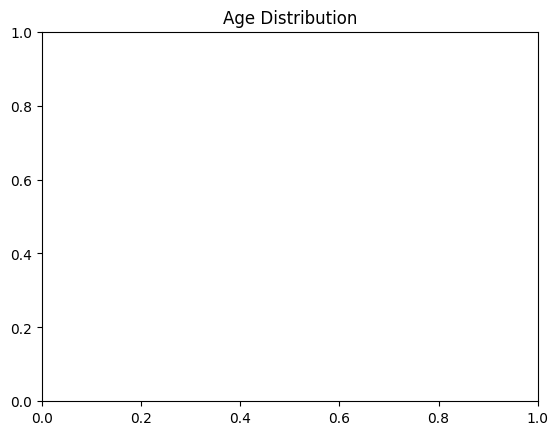

In [170]:
#sns.set_theme(style="whitegrid")
#sns.boxplot(x="Age", data=df, palette="Set3")
plt.title("Age Distribution")

C:\Users\sagan\AppData\Local\Temp\ipykernel_3284\4283695574.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

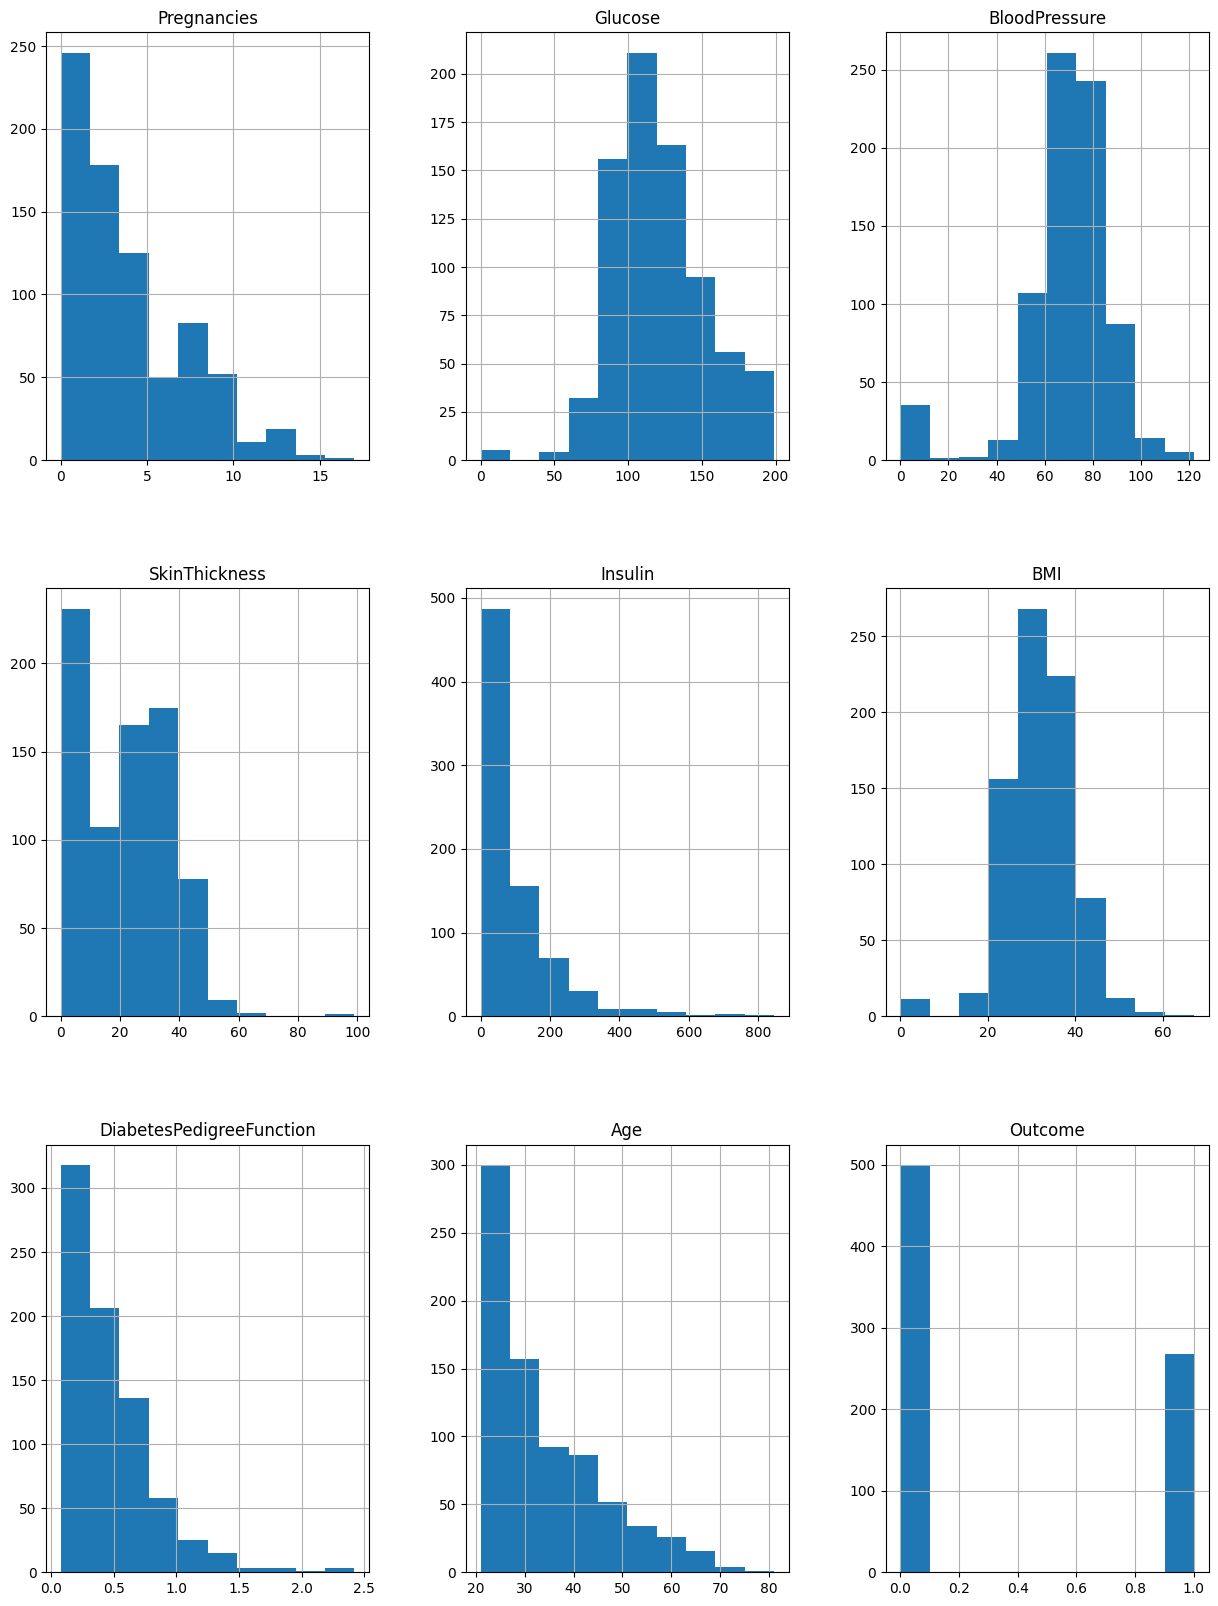

In [171]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

Text(0.5, 1.0, 'Outcome ')

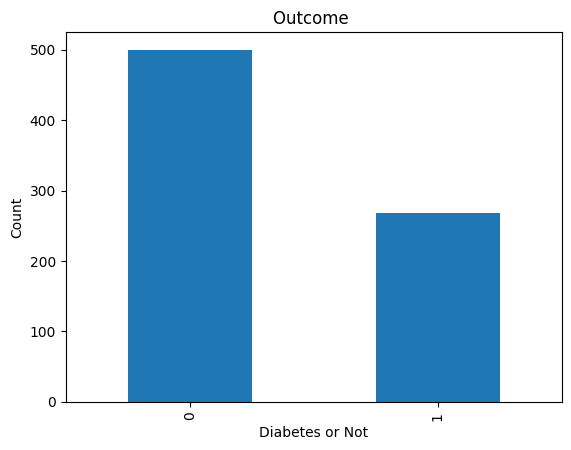

In [172]:
df.Outcome.value_counts().plot(kind='bar')
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Outcome ")
#Here we can see that dataset is not much imbalanced so there is no need to balance.

In [173]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [174]:
y=df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)


In [176]:
X_train.shape

(614, 8)

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

# KNN

In [179]:
from sklearn.neighbors import KNeighborsClassifier

In [180]:
import numpy as np

knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean',p=2)

X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

knn.fit(X_train_np, y_train)
knn.fit(X_train,y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [ ]:
y_pred=knn.predict(X_test)
y_pred

In [ ]:
knn.score(X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
mat

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

To select optimize k value we will use elbow method

In [ ]:
#For selecting K value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#From graph we can see that optimize k value is 16,17,18
# Now we will train our KNN classifier with this k values

knn=KNeighborsClassifier(n_neighbors=18,metric='euclidean',p=2)
knn.fit(X_train,y_train)

In [ ]:
y_pred=knn.predict(X_test)
y_pred

In [ ]:
knn.score(X_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
#sns.heatmap(mat, annot=True)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

6. Quantify goodness of your model and discuss steps taken for improvement.

    For this dataset KNN had archive 81% accuracy. We can further improve accuracy by using bagging and boosting techniques.

7. Can we use KNN for regression also? Why / Why not?

    KNN algorithm can be used for both classification and regression problems. The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

8. Discuss drawbacks of algorithms such as KNN
  
    -> It does not work well with large dataset and high dimensional dataset.

    -> Knn is noise sensitive dataset, we need to do feature engineering like outlier removal, handling missing value,etc.

    -> Require high memory – need to store all of the training data

    -> Given that it stores all of the training, it can be computationally expensive


# Saga: Basic KNN Classification on the Diabetes 1. dataset

x and y are your feature variables and target variable, respectively, as discussed earlier.

train_test_split is a function from scikit-learn (sklearn.model_selection) that randomly splits your dataset into training and testing sets.

test_size is set first to 0.2, which means that 20% of your data will be used for testing, and the remaining 80% will be used for training the machine learning model.

shuffle is set to True, which means that your data will be shuffled before splitting. This is important to ensure that the data is randomly distributed between the training and testing sets.

random_state is set to 42, which is the seed for the random number generator used to shuffle and split the data. Setting a random seed ensures that the split is reproducible, meaning that you will get the same split if you use the same seed again.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
x_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

The data processed here is relatively small = 768 samples
How to divide the samples for training and testing? 

70% Training, 30% Testing:
Training set: 537 samples (approximately 70% of 768)
Testing set: 231 samples (approximately 30% of 768)
80% Training, 20% Testing:

Training set: 614 samples (approximately 80% of 768)
Testing set: 154 samples (approximately 20% of 768)
75% Training, 25% Testing:

Training set: 576 samples (approximately 75% of 768)
Testing set: 192 samples (approximately 25% of 768)

The choice of the split ratio can depend on your specific problem and the amount of data you have available. A larger training set can be beneficial when you have a lot of data, as it allows the model to learn more from the data. However, if your dataset is small or you need a robust evaluation of your model's generalization, you might prefer a larger testing set.


In [ ]:
K=3  # You should test the classifier with different values of K to see which value provides the best performance for your classifier JA DIABETES DATASETISSA OLI KAKSI LUOKKAA NIIN K=2 EI OLE SITEN HYVA VALINTA YHDEKSI K ARVOKSI, VAAN ESIMERKIKSI TASSA TAPAUKSESSA VOIDAAN ALOITTAA K=3 ARVOLLA. 
knn=KNeighborsClassifier(K)
# Tassa on kyse valvotusta oppimisesta, joten tassa otetaan mukaan x-train piirremuuttujat, seka ne target arvot mukaan treenaamiseen. Fit metodilla tarkoitetaan treenausta. 
knn.fit(X_train, y_train)
# ennustus eli predict vaihe, missa lasketaan etaisyydet, ensin kaikkiin pisteisiin, sitten sort- jarjestellaan, sitten return-palautetaan ne ennustukset siitä, mihin luokkaan algoritmi olettaa kukkasten kuuluvan
y_pred=knn.predict(X_test)
print(y_pred_sklearn)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_sklearn)
accuracy_score(y_test, y_pred_sklearn)
print("Accuracy:", accuracy)

test_size is set to 0.3, which means that 30% of your data will be used for testing, and the remaining 70% will be used for training your machine learning model.

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 42)

Chose k-value 13 as it's odd (Diabetes dataset has two classess) and looping through k-values between 1-100 shows 0.748... as maximun on k-value 13. 

In [ ]:
for k in range(1,100):
  knn=KNeighborsClassifier(k)
  knn.fit(x_train, y_train)
  y_pred_sklearn= knn.predict(x_test)
  print(accuracy_score(y_test, y_pred_sklearn))

In [ ]:
K=13 
knn=KNeighborsClassifier(K)
knn.fit(x_train, y_train)
y_pred_sklearn= knn.predict(x_test)
print(y_pred_sklearn)

Achieved higher accuracy score with k=13

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_sklearn)
accuracy_score(y_test, y_pred_sklearn)
print("Accuracy:", accuracy)

In [ ]:
K-Fold Cross validation: 
*Step 1: Divide the Dataset

The dataset is divided into K subsets or folds. For example, if you have 1,000 data points and choose K=5, you would have five equally sized folds, each containing 200 data points.

* Step 2: Training and Testing

The model is trained and evaluated K times.
In each iteration, one of the K folds is used as the test set, and the other K-1 folds are used as the training set.

* Step 3: Performance Metric

For each iteration, a performance metric, such as accuracy or mean squared error, is computed on the test set.

* Step 4: Average the Results

The K performance metrics are averaged to obtain a single performance measure for the model.

* Step 5: Model Selection and Hyperparameter Tuning

K-Fold Cross-Validation can also be used for model selection and hyperparameter tuning. For example, you can run K-Fold Cross-Validation for different hyperparameters and choose the hyperparameters that result in the best average performance.

In [ ]:
from sklearn.model_selection import KFold


n_splits= 3 ## Choose the number of splits
k=12
kf= KFold(n_splits= n_splits, shuffle=True) ## Call the K Fold function. Note because of shuffle, the results may vary run by run
summa=0

for train_idx, test_idx in  kf.split(X): ## Loop over the splits
    x_train = X.iloc[train_idx, :] ## fetch the values
    x_test = X.iloc[test_idx, :]

    y_train = y.iloc[train_idx] ## fetch the values
    y_test = y.iloc[test_idx]

    knn=KNeighborsClassifier(k)
    knn.fit(x_train, y_train)

    y_pred_test = knn.predict(x_test)

    summa += accuracy_score(y_pred_test, y_test)

print(summa/n_splits)

